In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('q_quora_train.csv')

In [41]:
df = df.iloc[:, :6]

In [5]:
df['is_duplicate'] = pd.to_numeric(df['is_duplicate'], errors='coerce')

In [42]:
df = df[df['is_duplicate'].isin([0, 1])]

In [7]:
df['is_duplicate'] = df['is_duplicate'].astype(int)

In [8]:
df.shape

(404015, 6)

In [9]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [11]:
new_df = df.sample(30000,random_state=2)

In [12]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [13]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
95241,95241,189061,189062,Is Michelle Obama a transgender person?,What are the most attractive photos of Michell...,0
185512,185512,366337,366338,What's the main reason behind 500 & 1000 rs no...,Why are 500 and 1000 notes being banned in India?,1
178179,178179,351959,351960,Why England is not returning Kohinoor Diamond ...,Why won't Britain return the Koh-i-Noor Diamon...,1
366934,366934,718195,718196,What will a career in NABARD be like? How is i...,Is an engineer eligible for the NABARD assista...,0
215887,215887,425692,425693,Which MBA college should I opt for in Asia wit...,Which colleges can I get into with 770 GMAT sc...,0


In [14]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [15]:
new_df.duplicated().sum()

0

is_duplicate
0    18880
1    11120
Name: count, dtype: int64
is_duplicate
0    62.933333
1    37.066667
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

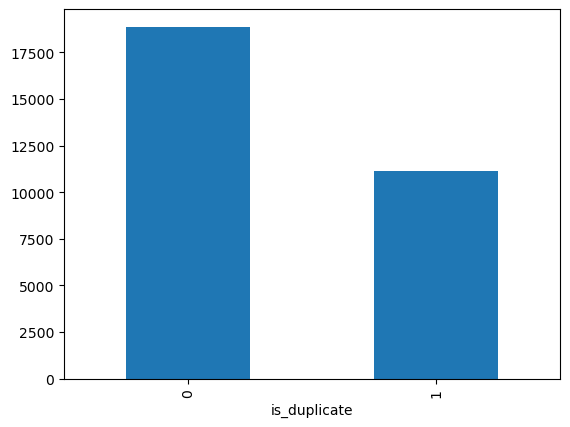

In [16]:
# Distribution of duplicate and non-duplicate questions

print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [17]:
# Repeated questions

qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 59832
Number of questions getting repeated 145


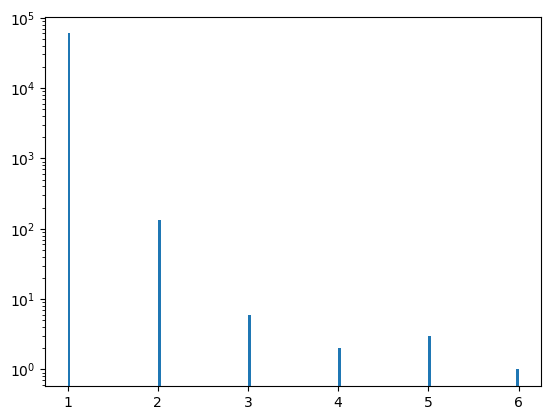

In [18]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [19]:
# Feature Engineering

new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()

In [20]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
95241,95241,189061,189062,Is Michelle Obama a transgender person?,What are the most attractive photos of Michell...,0,39,54
185512,185512,366337,366338,What's the main reason behind 500 & 1000 rs no...,Why are 500 and 1000 notes being banned in India?,1,134,49
178179,178179,351959,351960,Why England is not returning Kohinoor Diamond ...,Why won't Britain return the Koh-i-Noor Diamon...,1,60,57
366934,366934,718195,718196,What will a career in NABARD be like? How is i...,Is an engineer eligible for the NABARD assista...,0,121,62
215887,215887,425692,425693,Which MBA college should I opt for in Asia wit...,Which colleges can I get into with 770 GMAT sc...,0,68,50


In [21]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
95241,95241,189061,189062,Is Michelle Obama a transgender person?,What are the most attractive photos of Michell...,0,39,54,6,9
185512,185512,366337,366338,What's the main reason behind 500 & 1000 rs no...,Why are 500 and 1000 notes being banned in India?,1,134,49,24,10
178179,178179,351959,351960,Why England is not returning Kohinoor Diamond ...,Why won't Britain return the Koh-i-Noor Diamon...,1,60,57,10,9
366934,366934,718195,718196,What will a career in NABARD be like? How is i...,Is an engineer eligible for the NABARD assista...,0,121,62,23,10
215887,215887,425692,425693,Which MBA college should I opt for in Asia wit...,Which colleges can I get into with 770 GMAT sc...,0,68,50,15,10


In [22]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [23]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
95241,95241,189061,189062,Is Michelle Obama a transgender person?,What are the most attractive photos of Michell...,0,39,54,6,9,1
185512,185512,366337,366338,What's the main reason behind 500 & 1000 rs no...,Why are 500 and 1000 notes being banned in India?,1,134,49,24,10,5
178179,178179,351959,351960,Why England is not returning Kohinoor Diamond ...,Why won't Britain return the Koh-i-Noor Diamon...,1,60,57,10,9,4
366934,366934,718195,718196,What will a career in NABARD be like? How is i...,Is an engineer eligible for the NABARD assista...,0,121,62,23,10,2
215887,215887,425692,425693,Which MBA college should I opt for in Asia wit...,Which colleges can I get into with 770 GMAT sc...,0,68,50,15,10,4


In [24]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [25]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
95241,95241,189061,189062,Is Michelle Obama a transgender person?,What are the most attractive photos of Michell...,0,39,54,6,9,1,15
185512,185512,366337,366338,What's the main reason behind 500 & 1000 rs no...,Why are 500 and 1000 notes being banned in India?,1,134,49,24,10,5,32
178179,178179,351959,351960,Why England is not returning Kohinoor Diamond ...,Why won't Britain return the Koh-i-Noor Diamon...,1,60,57,10,9,4,19
366934,366934,718195,718196,What will a career in NABARD be like? How is i...,Is an engineer eligible for the NABARD assista...,0,121,62,23,10,2,30
215887,215887,425692,425693,Which MBA college should I opt for in Asia wit...,Which colleges can I get into with 770 GMAT sc...,0,68,50,15,10,4,25


In [26]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
95241,95241,189061,189062,Is Michelle Obama a transgender person?,What are the most attractive photos of Michell...,0,39,54,6,9,1,15,0.07
185512,185512,366337,366338,What's the main reason behind 500 & 1000 rs no...,Why are 500 and 1000 notes being banned in India?,1,134,49,24,10,5,32,0.16
178179,178179,351959,351960,Why England is not returning Kohinoor Diamond ...,Why won't Britain return the Koh-i-Noor Diamon...,1,60,57,10,9,4,19,0.21
366934,366934,718195,718196,What will a career in NABARD be like? How is i...,Is an engineer eligible for the NABARD assista...,0,121,62,23,10,2,30,0.07
215887,215887,425692,425693,Which MBA college should I opt for in Asia wit...,Which colleges can I get into with 770 GMAT sc...,0,68,50,15,10,4,25,0.16


minimum characters 3
maximum characters 314
average num of characters 59


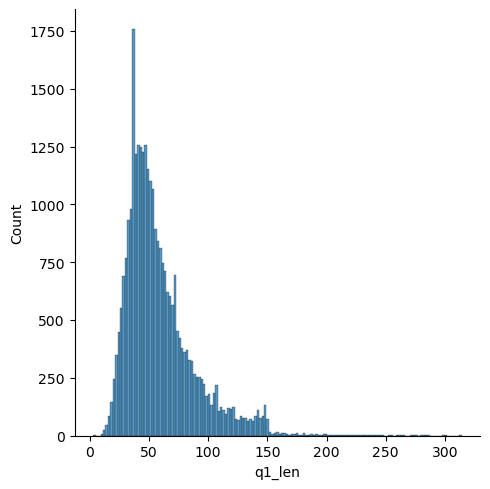

In [27]:
# Analysis of features
sns.displot(new_df['q1_len'])
print('minimum characters',new_df['q1_len'].min())
print('maximum characters',new_df['q1_len'].max())
print('average num of characters',int(new_df['q1_len'].mean()))

minimum characters 5
maximum characters 1151
average num of characters 59


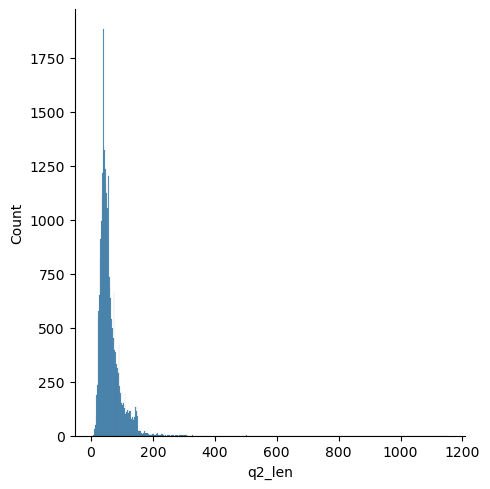

In [28]:
sns.displot(new_df['q2_len'])
print('minimum characters',new_df['q2_len'].min())
print('maximum characters',new_df['q2_len'].max())
print('average num of characters',int(new_df['q2_len'].mean()))

minimum words 1
maximum words 62
average num of words 10


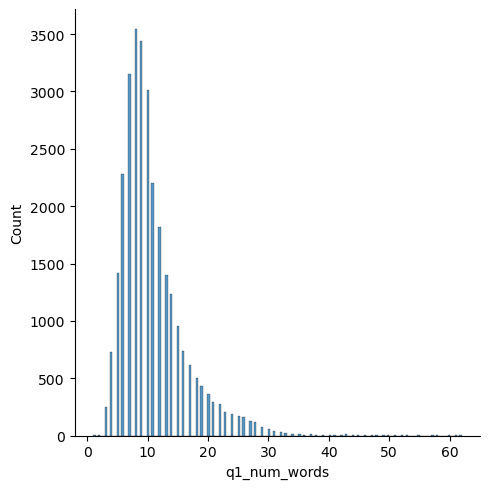

In [29]:
sns.displot(new_df['q1_num_words'])
print('minimum words',new_df['q1_num_words'].min())
print('maximum words',new_df['q1_num_words'].max())
print('average num of words',int(new_df['q1_num_words'].mean()))

minimum words 1
maximum words 237
average num of words 11


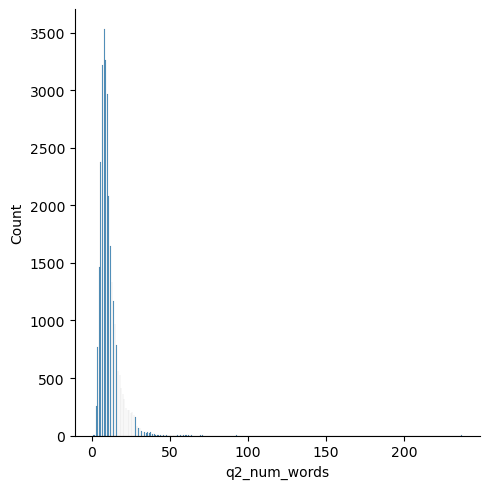

In [30]:
sns.displot(new_df['q2_num_words'])
print('minimum words',new_df['q2_num_words'].min())
print('maximum words',new_df['q2_num_words'].max())
print('average num of words',int(new_df['q2_num_words'].mean()))

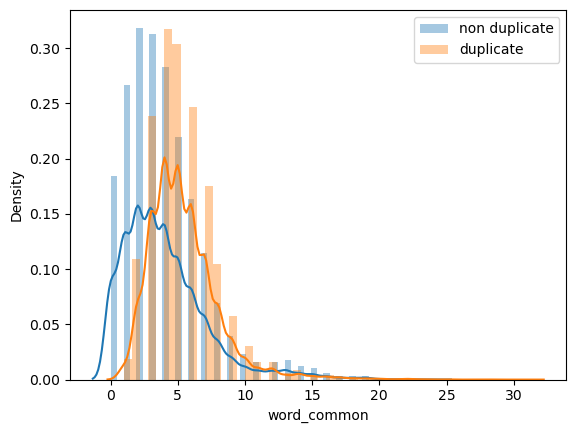

In [31]:
# common words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()

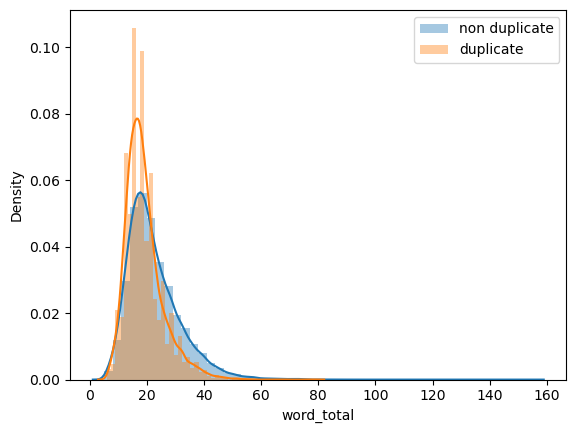

In [32]:
# total words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

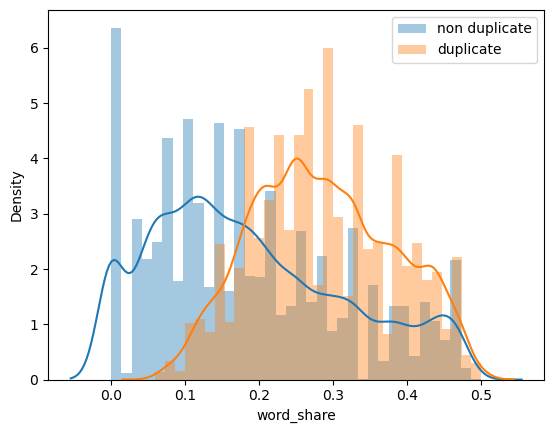

In [33]:
# word share
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [34]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
95241,Is Michelle Obama a transgender person?,What are the most attractive photos of Michell...
185512,What's the main reason behind 500 & 1000 rs no...,Why are 500 and 1000 notes being banned in India?
178179,Why England is not returning Kohinoor Diamond ...,Why won't Britain return the Koh-i-Noor Diamon...
366934,What will a career in NABARD be like? How is i...,Is an engineer eligible for the NABARD assista...
215887,Which MBA college should I opt for in Asia wit...,Which colleges can I get into with 770 GMAT sc...


In [35]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
95241,0,39,54,6,9,1,15,0.07
185512,1,134,49,24,10,5,32,0.16
178179,1,60,57,10,9,4,19,0.21
366934,0,121,62,23,10,2,30,0.07
215887,0,68,50,15,10,4,25,0.16


In [36]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [37]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [38]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
95241,0,39,54,6,9,1,15,0.07,0,0,...,0,0,0,0,0,0,0,0,0,0
185512,1,134,49,24,10,5,32,0.16,0,0,...,0,0,0,0,0,0,0,0,0,0
178179,1,60,57,10,9,4,19,0.21,0,0,...,0,0,0,0,0,0,0,0,0,0
366934,0,121,62,23,10,2,30,0.07,0,0,...,0,0,0,0,0,0,0,0,0,0
215887,0,68,50,15,10,4,25,0.16,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.763

In [37]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

[08:57:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7645

## Advanced Features

### 1. Token Features
- **cwc_min**: This is the ratio of the number of common words to the length of the smaller question
- **cwc_max**: This is the ratio of the number of common words to the length of the larger question
- **csc_min**: This is the ratio of the number of common stop words to the smaller stop word count among the two questions
- **csc_max**: This is the ratio of the number of common stop words to the larger stop word count among the two questions
- **ctc_min**: This is the ratio of the number of common tokens to the smaller token count among the two questions
- **ctc_max**: This is the ratio of the number of common tokens to the larger token count among the two questions
- **last_word_eq**: 1 if the last word in the two questions is same, 0 otherwise
- **first_word_eq**: 1 if the first word in the two questions is same, 0 otherwise

### 2. Length Based Features
- **mean_len**: Mean of the length of the two questions (number of words)
- **abs_len_diff**: Absolute difference between the length of the two questions (number of words)
- **longest_substr_ratio**: Ratio of the length of the longest substring among the two questions to the length of the smaller question

### 3. Fuzzy Features
- **fuzz_ratio**: fuzz_ratio score from fuzzywuzzy
- **fuzz_partial_ratio**: fuzz_partial_ratio from fuzzywuzzy
- **token_sort_ratio**: token_sort_ratio from fuzzywuzzy
- **token_set_ratio**: token_set_ratio from fuzzywuzzy